In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING)
df.head(5)

,CONTENT_TYPE,DATE,TIMESTAMP,BRAND,IMPACT,ENGAGEMENT,CONTENT_HASHTAGS,CHANNEL_INFO_CHANNEL,CHANNEL_INFO_TYPE,CONTENT_TEXT,CONTENT_LINK_TITLE,CONTENT_RETWEET_COUNT,CONTENT_FAVORITE_COUNT,GAMERESULTS
0,tweet,1/31/22 0:00,1/31/22 9:51,172721,0.4970,151,NaN,twitter,photo,Lets close this trip out on a high.\n\n¡: 7:...,NaN,10,141,LOSS
1,tweet,1/31/22 0:00,1/31/22 10:18,172721,1.8650,632,NEWS,twitter,link,#NEWS: Due to the recent passing of his father...,Ruff to Miss Two Games with Passing of his Fat...,61,571,LOSS
2,tweet,1/31/22 0:00,1/31/22 12:07,172721,0.6897,231,NaN,twitter,photo,Putting in work up north. https://t.co/yoYZGN3xeO,NaN,10,221,LOSS
3,tweet,1/31/22 0:00,1/31/22 13:42,172721,0.1824,61,NaN,twitter,photo, The Transition Game\n After a Year and a Ha...,NaN,4,57,LOSS
4,tweet,1/31/22 0:00,1/31/22 9:00,172721,0.0132,4,NaN,twitter,photo,Lets close this trip out on a high.\n\n¡: 7 ...,NaN,0,4,LOSS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17270 entries, 0 to 17269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CONTENT_TYPE            17270 non-null  object 
 1   DATE                    17270 non-null  object 
 2   TIMESTAMP               17270 non-null  object 
 3   BRAND                   17270 non-null  int64  
 4   IMPACT                  17270 non-null  float64
 5   ENGAGEMENT              17270 non-null  int64  
 6   CONTENT_HASHTAGS        10174 non-null  object 
 7   CHANNEL_INFO_CHANNEL    17270 non-null  object 
 8   CHANNEL_INFO_TYPE       17270 non-null  object 
 9   CONTENT_TEXT            15903 non-null  object 
 10  CONTENT_LINK_TITLE      4380 non-null   object 
 11  CONTENT_RETWEET_COUNT   17270 non-null  int64  
 12  CONTENT_FAVORITE_COUNT  17270 non-null  int64  
 13  GAMERESULTS             17270 non-null  object 
dtypes: float64(1), int64(4), object(9)
mem

In [4]:
df.dtypes

CONTENT_TYPE               object
DATE                       object
TIMESTAMP                  object
BRAND                       int64
IMPACT                    float64
ENGAGEMENT                  int64
CONTENT_HASHTAGS           object
CHANNEL_INFO_CHANNEL       object
CHANNEL_INFO_TYPE          object
CONTENT_TEXT               object
CONTENT_LINK_TITLE         object
CONTENT_RETWEET_COUNT       int64
CONTENT_FAVORITE_COUNT      int64
GAMERESULTS                object
dtype: object

In [5]:
df['CONTENT_TEXT']=df['CONTENT_TEXT'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))


In [6]:
df=df.dropna(subset=['CONTENT_TEXT'])

In [7]:
text=[]
for i in range(df.shape[0]):
    s=re.sub('https?://[A-Za-z0-9./]+','',df['CONTENT_TEXT'][i])
    text.append(s)

In [8]:
df['final_text']=text

In [9]:
df.isna().sum()

CONTENT_TYPE                  0
DATE                          0
TIMESTAMP                     0
BRAND                         0
IMPACT                        0
ENGAGEMENT                    0
CONTENT_HASHTAGS           7096
CHANNEL_INFO_CHANNEL          0
CHANNEL_INFO_TYPE             0
CONTENT_TEXT                  0
CONTENT_LINK_TITLE        12890
CONTENT_RETWEET_COUNT         0
CONTENT_FAVORITE_COUNT        0
GAMERESULTS                   0
final_text                    0
dtype: int64

In [10]:
df=df.dropna(subset=['CONTENT_TEXT'])

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   15
Count of rows in the data is:   17270


In [12]:
df['GAMERESULTS'].nunique()

3

In [13]:
df.groupby('GAMERESULTS').count()['CONTENT_TYPE']

GAMERESULTS
LOSS        3370
NO GAME    11640
WON         2260
Name: CONTENT_TYPE, dtype: int64

<AxesSubplot:title={'center':'Distribution of data'}, xlabel='GAMERESULTS'>

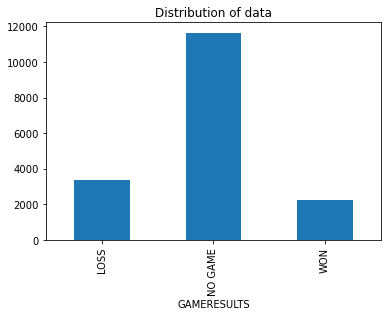

In [14]:
df.groupby('GAMERESULTS')['CONTENT_TYPE'].count().plot(kind='bar', title='Distribution of data')

In [15]:
data=df.copy()
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
data['GAMERESULTS']= label_encoder.fit_transform(data['GAMERESULTS']) 
data['GAMERESULTS'].unique()


array([0, 1, 2])

In [16]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 
            'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [17]:
data.head()

,CONTENT_TYPE,DATE,TIMESTAMP,BRAND,IMPACT,ENGAGEMENT,CONTENT_HASHTAGS,CHANNEL_INFO_CHANNEL,CHANNEL_INFO_TYPE,CONTENT_TEXT,CONTENT_LINK_TITLE,CONTENT_RETWEET_COUNT,CONTENT_FAVORITE_COUNT,GAMERESULTS,final_text
0,tweet,1/31/22 0:00,1/31/22 9:51,172721,0.4970,151,NaN,twitter,photo,Lets close this trip out on a high.\n\n: 7:30 ...,NaN,10,141,0,Lets close this trip out on a high.\n\n: 7:30 ...
1,tweet,1/31/22 0:00,1/31/22 10:18,172721,1.8650,632,NEWS,twitter,link,#NEWS: Due to the recent passing of his father...,Ruff to Miss Two Games with Passing of his Fat...,61,571,0,#NEWS: Due to the recent passing of his father...
2,tweet,1/31/22 0:00,1/31/22 12:07,172721,0.6897,231,NaN,twitter,photo,Putting in work up north. https://t.co/yoYZGN3xeO,NaN,10,221,0,Putting in work up north.
3,tweet,1/31/22 0:00,1/31/22 13:42,172721,0.1824,61,NaN,twitter,photo,The Transition Game\n After a Year and a Half...,NaN,4,57,0,The Transition Game\n After a Year and a Half...
4,tweet,1/31/22 0:00,1/31/22 9:00,172721,0.0132,4,NaN,twitter,photo,Lets close this trip out on a high.\n\n: 7 PM\...,NaN,0,4,0,Lets close this trip out on a high.\n\n: 7 PM\...


In [18]:
len(data.columns)

15

In [19]:
X=data.CONTENT_TEXT
y=data.GAMERESULTS

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state =42)


In [20]:

vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [21]:
X_train

<11570x20456 sparse matrix of type '<class 'numpy.float64'>'
	with 189431 stored elements in Compressed Sparse Row format>